# Chicago Crime Analysis
### Delivarable 3
### By Sai Vinay Pabbisetty
## Data source: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from pdpbox.pdp import pdp_isolate, pdp_plot
import gc
import psutil
import os
from sklearn.metrics import mean_absolute_error 

In [51]:
df = pd.read_csv("C://Users//saivi//Desktop//606 Capstone//ChicagoCrimes//Dataset//Crimes_-_2001_to_present.csv", index_col='Date')

In [52]:
df.head(5)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2001 11:00:00 AM,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
10/08/2017 03:00:00 AM,11227287,JB147188,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
03/28/2017 02:00:00 PM,11227583,JB147595,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
09/09/2017 08:17:00 PM,11227293,JB147230,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
08/26/2017 10:00:00 AM,11227634,JB147599,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.info()

In [ ]:
print(df.shape)
print(df.head())

### Handling Nulls & Missing values

In [7]:
df.isna().sum()

ID                           0
Case Number                  4
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      6177
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614830
Community Area          613496
FBI Code                     0
X Coordinate             67616
Y Coordinate             67616
Year                         0
Updated On                   0
Latitude                 67616
Longitude                67616
Location                 67616
dtype: int64

In [8]:
df = df.dropna(subset=['Latitude', 'Longitude', 'Location','X Coordinate','Y Coordinate'])

df.isna().sum()

ID                           0
Case Number                  3
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      4075
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    605575
Community Area          604292
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

In [9]:
df = df.dropna() 
df.isna().sum()

ID                      0
Case Number             0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

## EDA :

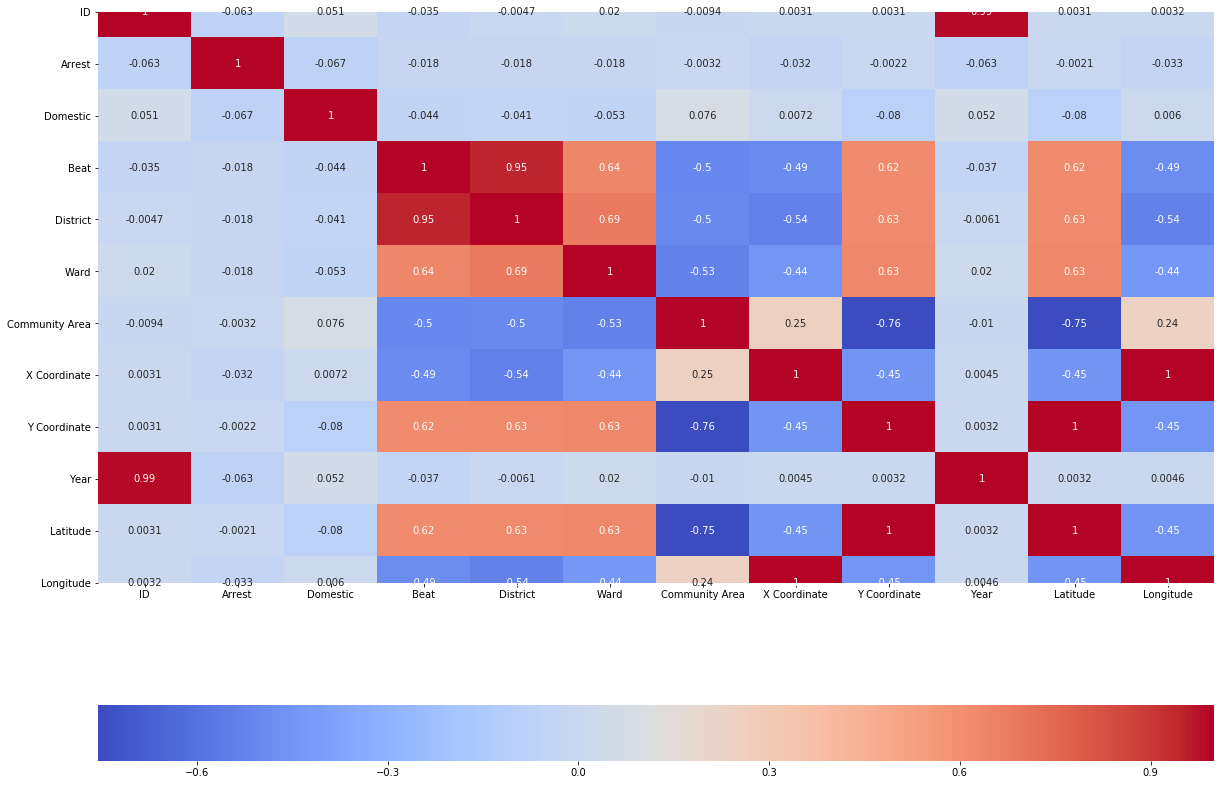

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm',cbar_kws= {'orientation': 'horizontal'})


## Which crimes are most frequently committed?

In [11]:
chcgo_crime_count = pd.DataFrame(df[['Primary Type']].groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [12]:
chcgo_crime_count.shape

(34, 2)

In [13]:
chcgo_crime_count.head()

,Primary Type,counts
0,THEFT,1354882
1,BATTERY,1168334
2,CRIMINAL DAMAGE,728526
3,NARCOTICS,652170
4,ASSAULT,401680


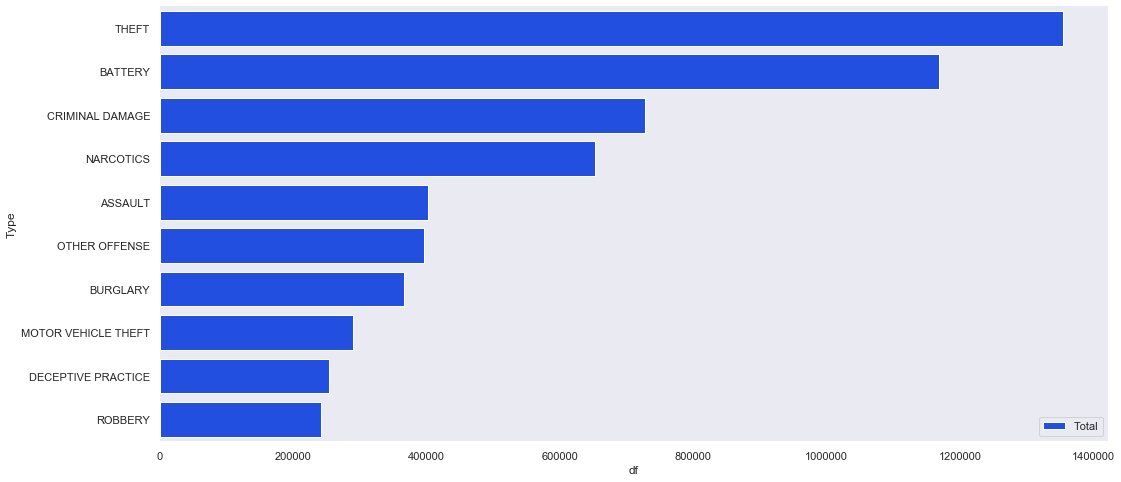

In [14]:
import seaborn as sns

sns.set(style="dark")

f, ax = plt.subplots(figsize=(17, 8))

sns.set_color_codes("bright")
sns.barplot(x="counts", y="Primary Type", data=chcgo_crime_count.iloc[:10, :],
            label="Total", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="df")
sns.despine(left=True, bottom=True)

plt.show()


## Different crimes over the years


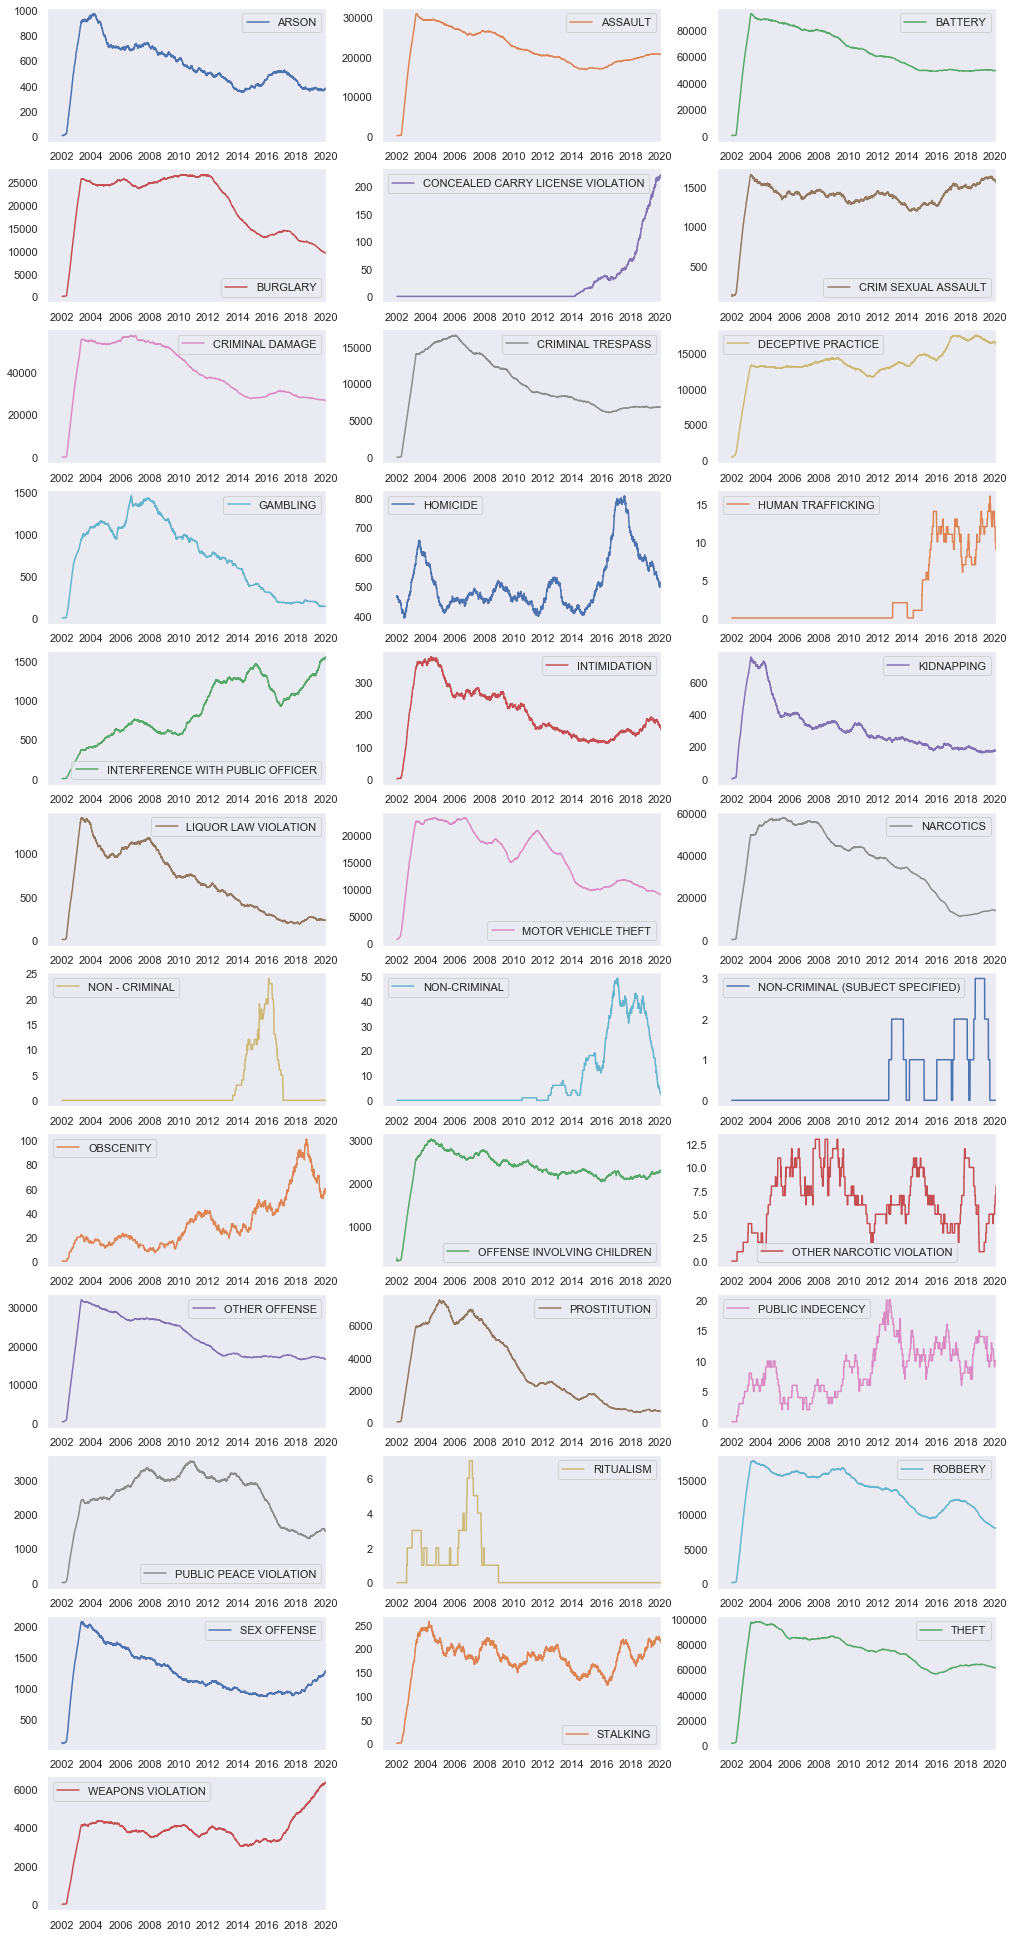

In [15]:
Crimes_Count=df.pivot_table('ID',aggfunc=np.size,columns='Primary Type',index=df.index.date,fill_value=0)
Crimes_Count.index=pd.DatetimeIndex(Crimes_Count.index)
plot=Crimes_Count.rolling(365).sum().plot(figsize=(17,35),subplots=True,layout=(-1,3),sharex=False,sharey=False)

## Which locations are these frequent crimes being committed to?

In [16]:
chcgo_crime_count_loc = pd.DataFrame(df[['Location Description']].groupby('Location Description').size().sort_values(ascending=False).rename('counts').reset_index())

In [17]:
chcgo_crime_count_loc.head()

,Location Description,counts
0,STREET,1638011
1,RESIDENCE,1059761
2,APARTMENT,696610
3,SIDEWALK,648001
4,OTHER,238681


In [18]:
chcgo_crime_count_loc.shape

(180, 2)

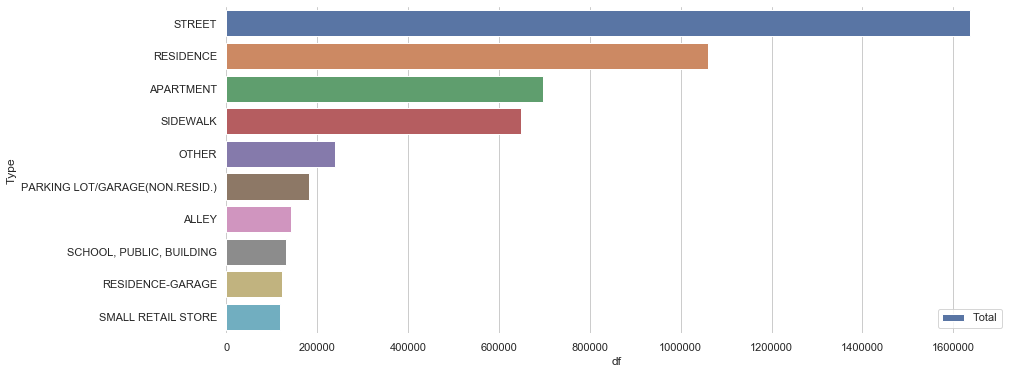

In [19]:
import seaborn as sns

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6))

sns.set_color_codes("deep")
sns.barplot(x="counts", y="Location Description", data=chcgo_crime_count_loc.iloc[:10, :],
            label="Total")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="df")
sns.despine(left=True, bottom=True)

plt.show()




## Sub types of the frequently commited crimes

In [20]:
df['Primary Type'].value_counts().head(5)

THEFT              1354882
BATTERY            1168334
CRIMINAL DAMAGE     728526
NARCOTICS           652170
ASSAULT             401680
Name: Primary Type, dtype: int64

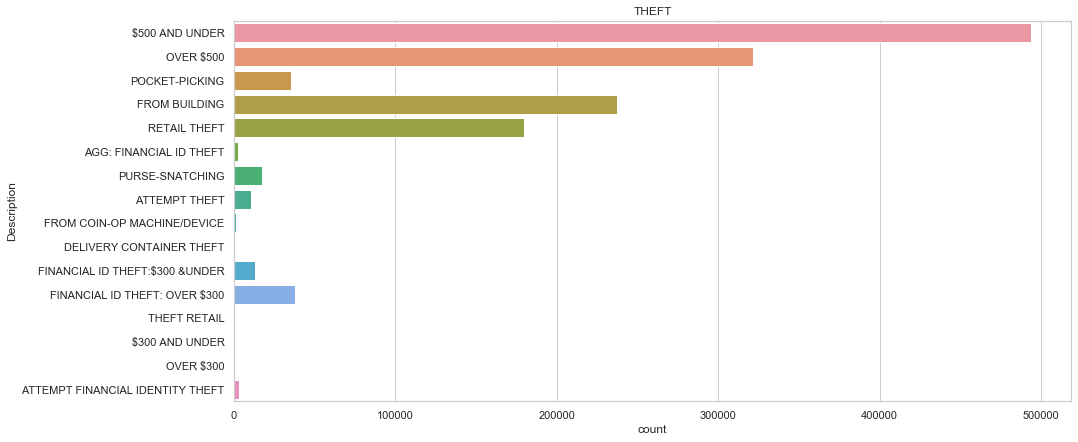

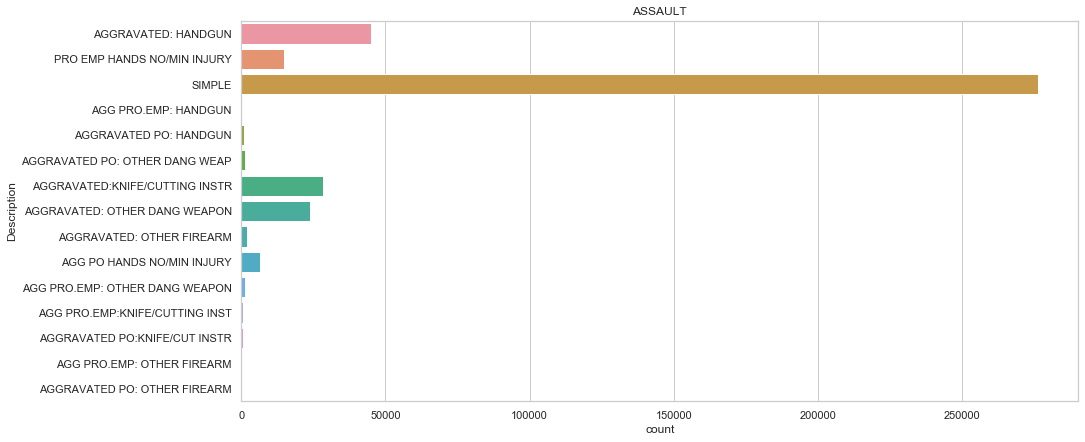

In [21]:
df_theft = df[df['Primary Type'] == 'THEFT']
plt.figure(figsize = (15, 7))
plt.title('THEFT')
sns.countplot(y = df_theft['Description'])

df_assault = df[df['Primary Type'] == 'ASSAULT']
plt.figure(figsize = (15, 7))
plt.title('ASSAULT')
sns.countplot(y = df_assault['Description'])

## Arrests

In [22]:
df_2012 = df.loc['2012']
df_2013 = df.loc['2013']
df_2014 = df.loc['2014']
df_2015 = df.loc['2015']
df_2016 = df.loc['2016']
df_2017 = df.loc['2017']
df_2017 = df.loc['2018']
df_2017 = df.loc['2019']
df_2017 = df.loc['2020']
yearly_arrests = df[df['Arrest'] == True]['Arrest']

In [23]:
print(yearly_arrests.head())

Date
2019-04-07 04:08:00    True
2019-04-20 20:50:00    True
2019-04-21 06:00:00    True
2019-05-20 13:00:00    True
2019-05-21 12:32:00    True
Name: Arrest, dtype: bool


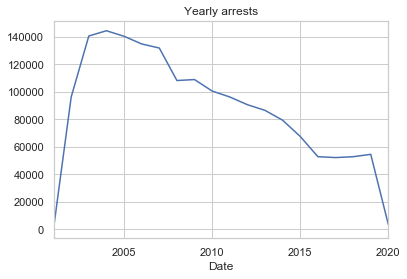

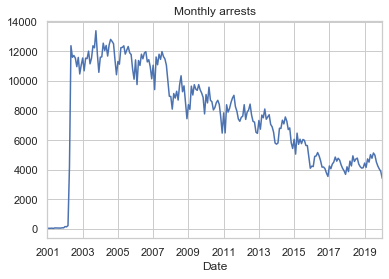

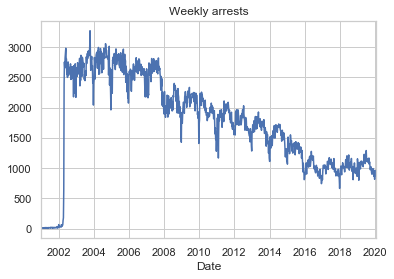

In [24]:
plt.subplot()

yearly_arrests.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()

yearly_arrests.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()

yearly_arrests.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()

plt.show()
plt.show()

## No of Crimes done on each day in a week till now

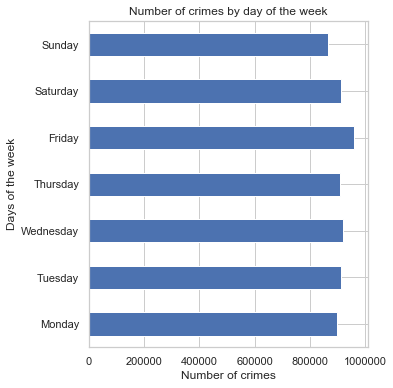

In [25]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='barh', figsize=(5, 6))
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

## Crimes based on district from 2001 to present

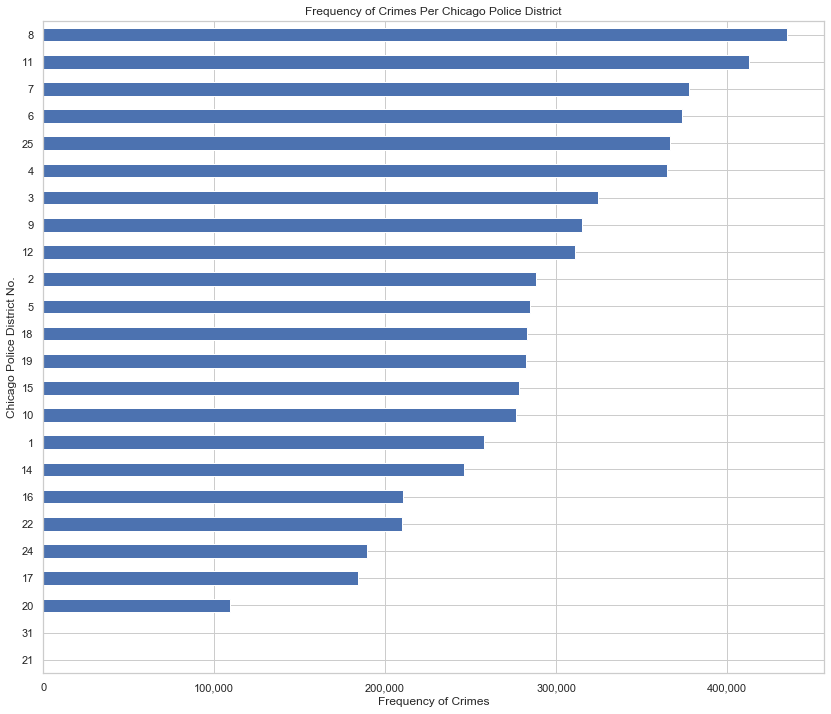

In [26]:
# calculating total number of incidents per district
district_crime = df['District'].value_counts(ascending=True)

## Data cleaning
district_crime.index = district_crime.index.astype(int)
district_crime.index = district_crime.index.astype(str)

## Plot bar graph for initial visualization
fig=plt.figure(figsize=(14, 12))
plt.title("Frequency of Crimes Per Chicago Police District")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Chicago Police District No.")
ax = district_crime.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

## Crime Mapping

In [27]:
c_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [28]:
locations = df.groupby('Community Area').first()
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(c_map)

In [29]:
c_map

## Modelling

In [30]:
df = pd.read_csv("C://Users//saivi//Desktop//606 Capstone//ChicagoCrimes//Dataset//Crimes_-_2001_to_present.csv")

In [31]:
df.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [32]:
#Converting Date column to desired date time format
df['Date']= pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S %p' , errors='coerce')
# df.index = pd.to_datetime(df.index)

In [33]:
df=df.drop_duplicates()

In [34]:
df['Arrest'].value_counts()  #Target Column value counts

False    5122283
True     1938845
Name: Arrest, dtype: int64

In [35]:
df['Primary Type'].value_counts(normalize=True)

THEFT                                2.114821e-01
BATTERY                              1.828092e-01
CRIMINAL DAMAGE                      1.137347e-01
NARCOTICS                            1.031477e-01
ASSAULT                              6.272468e-02
OTHER OFFENSE                        6.213738e-02
BURGLARY                             5.661999e-02
MOTOR VEHICLE THEFT                  4.604463e-02
DECEPTIVE PRACTICE                   4.059224e-02
ROBBERY                              3.760504e-02
CRIMINAL TRESPASS                    2.854091e-02
WEAPONS VIOLATION                    1.106410e-02
PROSTITUTION                         9.790220e-03
PUBLIC PEACE VIOLATION               7.021966e-03
OFFENSE INVOLVING CHILDREN           6.856128e-03
CRIM SEXUAL ASSAULT                  4.149195e-03
SEX OFFENSE                          3.789621e-03
INTERFERENCE WITH PUBLIC OFFICER     2.398767e-03
GAMBLING                             2.063551e-03
LIQUOR LAW VIOLATION                 2.029138e-03


In [36]:
# replacing values for feasibility and convenience
df= df.replace({False: 0, True: 1})

## Preparing the Data

In [37]:
target = 'Arrest'
features = df.columns.drop([target,'ID'])

X = df[features]
y = df[target]

X.shape,y.shape

((7061128, 20), (7061128,))

In [38]:
# Spllitting the data using train/validate/test 3-way split
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, train_size=0.80, test_size=0.20, random_state=42)
X_trainval.shape, X_test.shape, y_trainval.shape, y_test.shape

((5648902, 20), (1412226, 20), (5648902,), (1412226,))

In [39]:
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.2, random_state=42)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (4519121, 20)
y_train shape (4519121,)
X_val shape (1129781, 20)
y_val shape (1129781,)
X_test shape (1412226, 20)
y_test shape (1412226,)


In [40]:
pd.options.display.float_format = None
y_train.value_counts(normalize=True)

0    0.725165
1    0.274835
Name: Arrest, dtype: float64

In [41]:
y_train.head()

2938392    0
3157681    1
6121992    0
3187939    0
4225112    1
Name: Arrest, dtype: int64

In [42]:
majority_class = y_train.mode()[0] 
y_pred = np.full_like(y_val, fill_value=majority_class)
accuracy_score(y_val, y_pred)

0.7260115013440658

In [43]:
confusion_matrix(y_val, y_pred)

array([[820234,      0],
       [309547,      0]], dtype=int64)

In [44]:
conf_matrix=pd.DataFrame(confusion_matrix(y_val, y_pred))
conf_matrix.index = ['Actual False','Actual True']
conf_matrix.columns = ['Predicted False','Predicted True']
conf_matrix

,Predicted False,Predicted True
Actual False,820234,0
Actual True,309547,0


## Baseline

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = np.full_like(y_val, fill_value=1.00) ##fill with value 1 because wee ned a true probability that my event occur
roc_auc_score(y_val, y_pred_proba)

In [47]:
y_pred_proba = np.full_like(y_val, fill_value=0)
auc=roc_auc_score(y_val, y_pred_proba)
auc

In [48]:
fpr,tpr,thresholds=roc_curve(y_val, y_pred_proba)

NameError: name 'roc_curve' is not defined

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
def data_wrangler(X): #using data wrangling for date-based features
    X=X.copy()
    X['Month'] = X['Date'].dt.month  
    X['Day'] = X['Date'].dt.day
    X['Hour'] = X['Date'].dt.hour
    X['Weekday'] = X['Date'].dt.weekday_name
    X=X.drop(columns=['Date','Updated On'])
    return X

X_train=data_wrangler(X_train)
X_val=data_wrangler(X_val)
X_test=data_wrangler(X_test)

In [ ]:
print('X_train shape : ', X_train.shape,'y_train shape : ', y_train.shape,'X_val shape : ', X_val.shape,'y_val shape : ', y_val.shape,'X_test shape : ', X_test.shape,'y_test shape : ', y_test.shape)

## Models

In [ ]:
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

lr= make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    LogisticRegression(n_jobs=-1,solver='lbfgs', random_state=42, penalty='l2')
)

lr.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_val = lr.predict(X_val)
y_pred_test = lr.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, y_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, y_pred_test))

In [ ]:
lr_fp,lr_tp,thresholds = roc_curve(y_val,lr.predict_proba(X_val)[:,1])

auc_lr=roc_auc_score(y_val, lr.predict_proba(X_val)[:,1])

fig = plt.figure(dpi=80)
plt.scatter(lr_fp,lr_tp, s=6)
plt.title('ROC Curve', fontweight = 'bold', fontsize = 12)
plt.xlabel('False Positive:', fontsize = 10)
plt.ylabel('True Positive:', fontsize = 10);

In [ ]:

from xgboost import XGBClassifier

xgb = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

xgb.fit(X_train, y_train)

In [ ]:
###Get accuracy score for XGBClassifier
y_pred_val = xgb.predict(X_val)
y_pred_test = xgb.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, y_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, y_pred_test))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
xgb_fp,xgb_tp,thresholds = roc_curve(y_val,xgb.predict_proba(X_val)[:,1])

auc_xgb=roc_auc_score(y_val, xgb.predict_proba(X_val)[:,1])
fig = plt.figure(dpi=90)
plt.scatter(xgb_fp,xgb_tp, s=6)
plt.title('ROC Curve', fontweight = 'bold', fontsize = 12)
plt.xlabel('False Positive:', fontsize = 12)
plt.ylabel('True Positive:', fontsize = 12);

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
)

rf.fit(X_train, y_train);

In [ ]:
# RandomForestClassifier accuracy
y_pred_val = rf.predict(X_val)
y_pred_test = rf.predict(X_test)
print('Accuracy for the validation data= ',accuracy_score(y_val, y_pred_val))
print('Accuracy for the test data= ',accuracy_score(y_test, y_pred_test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_val))

In [ ]:
rf_fp,rf_tp,thresholds = roc_curve(y_val,rf.predict_proba(X_val)[:,1])

In [ ]:
auc_rf=roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])
fig = plt.figure(dpi=120)
plt.scatter(rf_fp,rf_tp,s=6)
plt.title('ROC Curve', fontweight = 'bold', fontsize = 10)
plt.xlabel('False Positive:', fontsize = 12)
plt.ylabel('True Positive:', fontsize = 12);

## Model Chosen:  Best performance Random Forest Classifier